# RETAIL CASE STUDY

In [ ]:
### importing the libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.


In [51]:
cust_data = pd.read_csv("Customer.csv")

In [1]:
cust_data

NameError: name 'cust_data' is not defined

In [53]:
prod_hier_data = pd.read_csv("prod_cat_info.csv")

In [54]:
prod_hier_data

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [55]:
trans = pd.read_csv("Transactions.csv")

In [56]:
trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [57]:
# merging the trans and cust_data.

cust_trans = pd.merge(left = cust_data, right = trans , left_on = 'customer_Id' , right_on = 'cust_id',how = 'inner', indicator = True)

In [58]:
cust_trans

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,both
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,both
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,both
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop,both
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both
23050,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR,both
23051,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop,both


In [59]:
# merging 
Customer_Final = pd.merge(left = cust_trans, right = prod_hier_data, left_on = 'prod_cat_code', right_on = 'prod_cat_code', how = 'inner')

In [60]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,1,Women


#### 2. Prepare a summary report for the merged data set.

##### a. Get the column names and their corresponding data types

In [61]:
Customer_Final.dtypes

customer_Id             int64
DOB                    object
Gender                 object
city_code             float64
transaction_id          int64
cust_id                 int64
tran_date              object
prod_subcat_code        int64
prod_cat_code           int64
Qty                     int64
Rate                    int64
Tax                   float64
total_amt             float64
Store_type             object
_merge               category
prod_cat               object
prod_sub_cat_code       int64
prod_subcat            object
dtype: object

#####  b. Top/Bottom 10 observations

In [62]:
# top 10 observations
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
5,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,6,DIY
6,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,7,Fiction
7,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,12,Academic
8,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,10,Non-Fiction
9,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,11,Children


In [63]:
# bottom 10 observations
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,09-12-1992,F,7.0,98631113719,274618,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,both,Clothing,3,Kids
99284,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,4,Mens
99285,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,1,Women
99286,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,3,Kids
99287,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,4,Mens
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,1,Women
99292,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,3,Kids


##### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [64]:
Customer_Final.describe()

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
count,99293.000000,99257.000000,9.929300e+04,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000
mean,271030.010635,5.467221,5.007320e+10,271030.010635,6.796894,4.003243,2.438017,637.919884,248.873736,2114.616420,6.806985
std,2429.333624,2.859343,2.899361e+10,2429.333624,3.609439,1.563991,2.260726,621.576326,187.014422,2502.306768,3.615952
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,268956.000000,3.000000,2.492150e+10,268956.000000,4.000000,3.000000,1.000000,313.000000,98.280000,762.450000,4.000000
50%,270982.000000,5.000000,5.011083e+10,270982.000000,7.000000,5.000000,3.000000,713.000000,199.920000,1761.370000,7.000000
75%,273120.000000,8.000000,7.528121e+10,273120.000000,10.000000,5.000000,4.000000,1109.000000,366.975000,3585.725000,10.000000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000


##### d. Frequency tables for all the categorical variables

In [65]:
# store_type

freq_table_1 = pd.crosstab(index = Customer_Final['Gender'] , columns = Customer_Final['Store_type'])
freq_table_1.columns = ['TeleShop','MBR','e-shop','Flagshipstore']
freq_table_1.index = ['M' ,'F']

In [66]:
freq_table_1

,TeleShop,MBR,e-shop,Flagshipstore
M,9767,9687,9159,19589
F,10047,10278,10142,20584


In [67]:
# prod_cat
freq_table_2 = pd.crosstab(index = Customer_Final['Gender'] , columns = Customer_Final['prod_cat'])
freq_table_2.columns = ['Books', 'Bags', 'Home and kitchen', 'Footwear', 'Electronics', 'Clothing']
freq_table_2.index = ['M','F']

In [68]:
freq_table_2

,Books,Bags,Home and kitchen,Footwear,Electronics,Clothing
M,1988,17694,4317,11640,4587,7976
F,2008,18696,4554,12850,4407,8536


In [69]:
# prod_subcat
freq_table_3 = pd.crosstab(index = Customer_Final['Gender'], columns = Customer_Final['prod_subcat'])
freq_table_3.columns =['Fiction',
 'Academic',
 'Non-Fiction',
 'Children',
 'Comics',
 'DIY',
 'Mens',
 'Women',
 'Furnishing',
 'Kitchen',
 'Bath',
 'Tools',
 'Kids',
 'Mobiles',
 'Computers',
 'Personal Appliances',
 'Cameras',
 'Audio and video']
freq_table_3.index = ['M' ,"F"]

In [70]:
freq_table_3

,Fiction,Academic,Non-Fiction,Children,Comics,DIY,Mens,Women,Furnishing,Kitchen,Bath,Tools,Kids,Mobiles,Computers,Personal Appliances,Cameras,Audio and video
M,2949,2328,1994,2328,2949,2949,2328,2949,2949,1994,2968,1994,3962,2328,2949,2328,1994,3962
F,3116,2570,2134,2570,3116,3116,2570,3116,3116,2134,2987,2134,3991,2570,3116,2570,2134,3991


#### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

<AxesSubplot:>

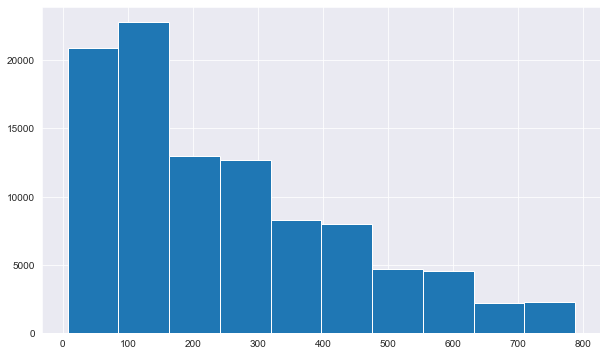

In [71]:
# histogram for continuous variables
# Tax
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
Customer_Final['Tax'].hist()


<AxesSubplot:>

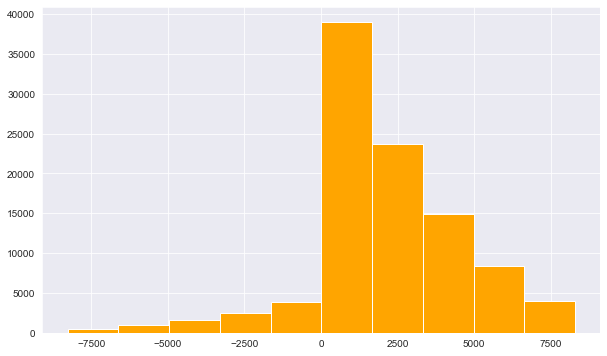

In [72]:
# total_amt
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
Customer_Final["total_amt"].hist(color = 'orange')

<AxesSubplot:>

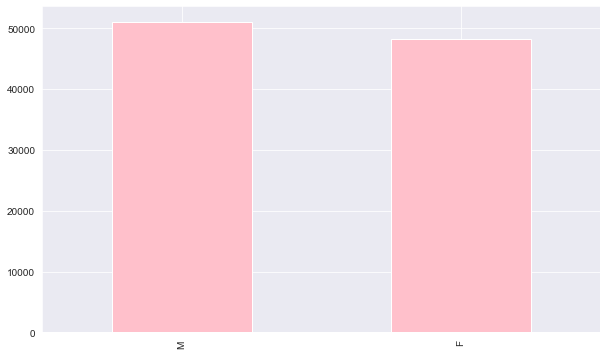

In [73]:
#  frequency bars for categorical variables
# Gender
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
Customer_Final['Gender'].value_counts().plot(kind = 'bar' , color = 'pink')

<AxesSubplot:>

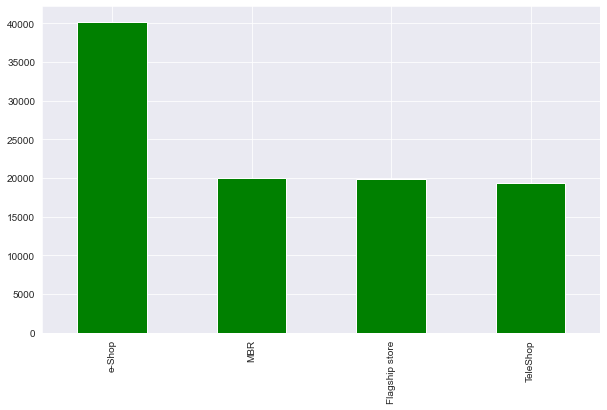

In [74]:
# Store_type
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
Customer_Final['Store_type'].value_counts().plot(kind = 'bar' , color = 'green')

<AxesSubplot:>

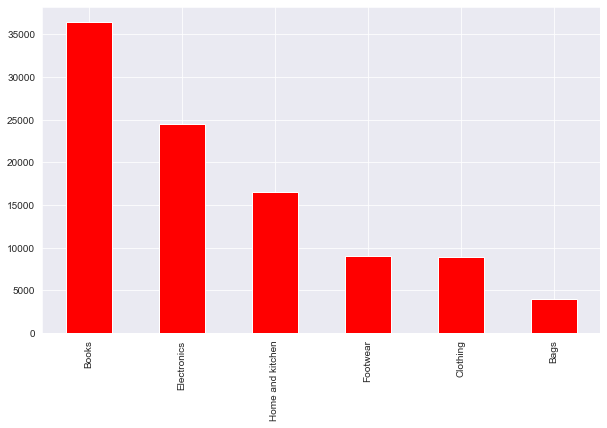

In [75]:
# Product category
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
Customer_Final["prod_cat"].value_counts().plot(kind = 'bar' , color = 'red')

<AxesSubplot:>

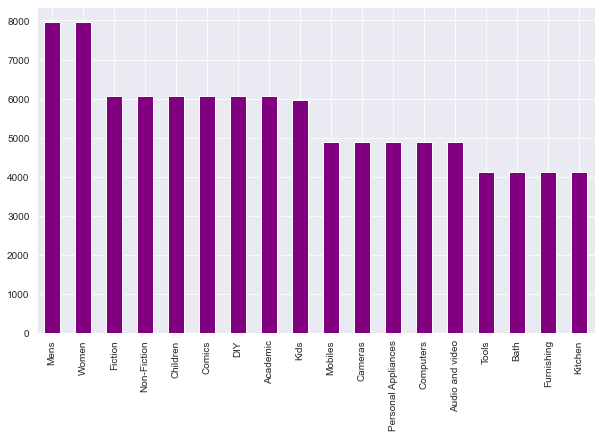

In [76]:
#  Product sub category
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
Customer_Final["prod_subcat"].value_counts().plot(kind = 'bar' , color ='purple')

#### 4. Calculate the following information using the merged dataset :

##### a. Time period of the available transaction data

In [77]:
Customer_Final["tran_date"] = pd.to_datetime(Customer_Final["tran_date"])

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\asus\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31-03-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\asus\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\asus\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-09-2012' in DD/MM/YYYY format. Provide format or specify in

In [78]:
 Customer_Final.sort_values(by ="tran_date").head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
43276,273429,14-05-1974,M,9.0,40426008634,273429,2011-01-02,2,6,1,1132,118.860,1250.860,e-Shop,both,Home and kitchen,11,Bath
87611,274459,13-02-1990,M,4.0,65685613041,274459,2011-01-02,4,3,-3,-968,304.920,-3208.920,TeleShop,both,Electronics,9,Cameras
43275,273429,14-05-1974,M,9.0,40426008634,273429,2011-01-02,2,6,1,1132,118.860,1250.860,e-Shop,both,Home and kitchen,10,Kitchen
43274,273429,14-05-1974,M,9.0,40426008634,273429,2011-01-02,2,6,1,1132,118.860,1250.860,e-Shop,both,Home and kitchen,2,Furnishing
35525,269958,04-07-1992,M,3.0,83849473598,269958,2011-01-02,12,5,3,403,126.945,1335.945,e-Shop,both,Books,6,DIY


In [79]:
min_date = Customer_Final["tran_date"].min()

max_date = Customer_Final["tran_date"].max()

print("Time period of the available transaction data is from "+ 
      pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


##### b. Count of transactions where the total amount of transaction was negative

In [80]:
data_set = Customer_Final['total_amt']
count = Customer_Final.loc[(data_set < 0) ,['transaction_id']].count()
count

transaction_id    9294
dtype: int64

#### 5. Analyze which product categories are more popular among females vs male customers.


In [81]:
# for male
M = Customer_Final.loc[Customer_Final['Gender'] == "M"]
group_prod = M.groupby(["prod_cat"])['total_amt'].sum()
popular = group_prod.nlargest(1)
display('The most popular product category in Male customers is : ', popular)
print("\n")
F = Customer_Final.loc[Customer_Final['Gender'] == "F"]
group_prod_1 = F.groupby(["prod_cat"])['total_amt'].sum()
popular_1 = group_prod_1.nlargest(1)
display('The most popular product category in Female customers is : ', popular_1)

'The most popular product category in Male customers is : '

prod_cat
Books    39875836.65
Name: total_amt, dtype: float64

'The most popular product category in Female customers is : '

prod_cat
Books    36988153.41
Name: total_amt, dtype: float64

#### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [82]:
Max_cust = Customer_Final['city_code'].value_counts()
n = Max_cust.nlargest(1)
print("City code which has Maximum customers is", n )
print('\n')
tot_customer = Customer_Final['customer_Id'].count()
percent = round((10571/tot_customer)*100,2)
print("Percentage of customers from the city code 4 is {}% : ".format(percent))

City code which has Maximum customers is 4.0    10571
Name: city_code, dtype: int64


Percentage of customers from the city code 4 is 10.65% : 


#### 7. Which store type sells the maximum products by value and by quantity?

In [83]:
Sort = Customer_Final.sort_values((['total_amt','Qty']),  ascending=False)
print(Sort.head(1)['Store_type'])

47986    TeleShop
Name: Store_type, dtype: object


#### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [84]:
data = pd.DataFrame(Customer_Final)
Tm = data[(data.prod_cat.isin([ "Electronics" ,  "Clothing" ]) & (data.Store_type == 'Flagship store'))]
total = Tm.total_amt.sum()
print("total amount earned", total)

total amount earned 14658949.89


#### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [85]:
T_amt = data[(data.Gender == "M") & (data.prod_cat == 'Electronics')]
total = T_amt.total_amt.sum()
print('total amount earned',total)

total amount earned 28515547.125


#### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [88]:
pos_trans = Customer_Final.loc[Customer_Final["total_amt"]>0,:]
pos_trans.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics


In [89]:
unique_trans = pos_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
unique_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Academic,1
1,266783,Books,Children,1
2,266783,Books,Comics,1
3,266783,Books,DIY,1
4,266783,Books,Fiction,1
...,...,...,...,...
63033,275265,Books,Non-Fiction,1
63034,275265,Home and kitchen,Bath,1
63035,275265,Home and kitchen,Furnishing,1
63036,275265,Home and kitchen,Kitchen,1


In [90]:
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()
unique_trans_count.head()

,customer_Id,transaction_id
0,266783,12
1,266784,11
2,266785,15
3,266788,11
4,266794,19


In [93]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]


,customer_Id,transaction_id
0,266783,12
1,266784,11
2,266785,15
3,266788,11
4,266794,19
...,...,...
5496,275249,11
5497,275250,11
5499,275252,19
5501,275257,18


In [94]:
print('There are no unique transactions greater than 10')

There are no unique transactions greater than 10


#### 11. For all customers aged between 25 - 35, find out:


#####  a. What was the total amount spent for “Electronics” and “Books” product categories?


In [106]:
Customer_Final["DOB"] = pd.to_datetime(Customer_Final["DOB"])

In [107]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_Id        99293 non-null  int64         
 1   DOB                99293 non-null  datetime64[ns]
 2   Gender             99253 non-null  object        
 3   city_code          99257 non-null  float64       
 4   transaction_id     99293 non-null  int64         
 5   cust_id            99293 non-null  int64         
 6   tran_date          99293 non-null  datetime64[ns]
 7   prod_subcat_code   99293 non-null  int64         
 8   prod_cat_code      99293 non-null  int64         
 9   Qty                99293 non-null  int64         
 10  Rate               99293 non-null  int64         
 11  Tax                99293 non-null  float64       
 12  total_amt          99293 non-null  float64       
 13  Store_type         99293 non-null  object        
 14  _merge

In [109]:
now = pd.Timestamp('now')
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format='%m%d%y')    # 1
Customer_Final['DOB'] = np.where(Customer_Final['DOB'] < now,Customer_Final['DOB'], Customer_Final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
Customer_Final['AGE'] = (now - Customer_Final['DOB']).astype('<m8[Y]')

In [110]:
data.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat,AGE
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction,52.0
1,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic,52.0
2,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction,52.0
3,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children,52.0
4,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics,52.0


In [112]:
Customer_Final['AGE'].unique()

array([52., 51., 50., 49., 48., 47., 46., 45., 44., 43., 42., 41., 40.,
       39., 38., 37., 36., 35., 34., 33., 32., 31., 30., 29.])

In [130]:
Customer_Final['Age_cat'] = pd.cut(Customer_Final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat,AGE,Age_cat
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction,52.0,47-57
1,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic,52.0,47-57
2,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction,52.0,47-57
3,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children,52.0,47-57
4,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics,52.0,47-57


In [135]:
customer_25_35 = Customer_Final.groupby(['Age_cat','prod_cat'])['total_amt'].sum().reset_index()
customer_25_35.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Age_cat    18 non-null     category
 1   prod_cat   18 non-null     object  
 2   total_amt  18 non-null     float64 
dtypes: category(1), float64(1), object(1)
memory usage: 566.0+ bytes


In [137]:
customer_25_35

,Age_cat,prod_cat,total_amt
0,25-35,Bags,2.163011e+06
1,25-35,Books,1.940715e+07
2,25-35,Clothing,5.523582e+06
3,25-35,Electronics,1.474826e+07
4,25-35,Footwear,5.262387e+06
5,25-35,Home and kitchen,9.346063e+06
6,36-46,Bags,3.846514e+06
7,36-46,Books,3.747453e+07
8,36-46,Clothing,8.823854e+06
9,36-46,Electronics,2.465812e+07


In [2]:
import numpy as np

In [7]:
a = np.arange(0,1,0.1)

In [8]:
a

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])